This notebook investigates how the data is masked along the coastline. I compare the case where missing_value is identical to FillValue(meta) and where they don't match (no_meta).

In [1]:
import xarray as xr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc

%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [ ]:
meta_U = nc.Dataset('/home/soontiensn/data/gpsc-work2/models/ciops-e/interp-cgrid/NEMO_RPN_1h_grid_U_2D_20160705-20160705.nc')
meta_V = nc.Dataset('/home/soontiensn/data/gpsc-work2/models/ciops-e/interp-cgrid/NEMO_RPN_1h_grid_V_2D_20160705-20160705.nc')

In [11]:
meta_U.set_auto_mask(False)
meta_V.set_auto_mask(False)


In [4]:
nometa_U = nc.Dataset('/home/soontiensn/data/gpsc-work2/models/ciops-e/interp-cgrid-old/NEMO_RPN_1h_grid_U_2D_20160705-20160705.nc')
nometa_V= nc.Dataset('/home/soontiensn/data/gpsc-work2/models/ciops-e/interp-cgrid-old/NEMO_RPN_1h_grid_V_2D_20160705-20160705.nc')

In [12]:
nometa_U.set_auto_mask(False)
nometa_V.set_auto_mask(False)

In [6]:
def plot_map(bmap, var, lat, lon,cmap='viridis'):
    x, y = bmap(lon, lat)
    mesh = bmap.pcolormesh(x,y,var,cmap=cmap)
    cbar=plt.colorbar(mesh,ax=ax)
    bmap.drawcoastlines()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(0.5, 1.0, 'No Meta')

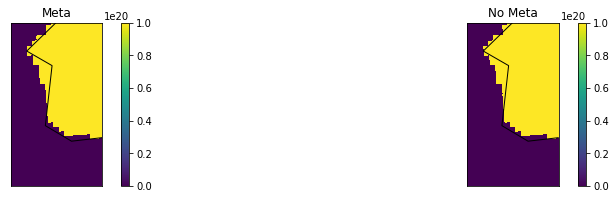

In [7]:
lon_min=-59.5
lat_min=47.4
lon_max=-59
lat_max=48

fig, axs = plt.subplots(1,2,figsize=(15,3))

ax=axs[0]
lonm_U=meta_U.variables['nav_lon'][:]
latm_U=meta_U.variables['nav_lat'][:]
um = meta_U.variables['uos'][0,0,:,:]
m = Basemap(projection='merc',llcrnrlat=lat_min,urcrnrlat=lat_max,llcrnrlon=lon_min,urcrnrlon=lon_max,resolution='l',ax=ax)
plot_map(m,um, latm_U, lonm_U)
ax.set_title('Meta')

ax=axs[1]
lonnm_U=nometa_U.variables['nav_lon'][:]
latnm_U=nometa_U.variables['nav_lat'][:]
unm =  nometa_U.variables['uos'][0,0,:,:]
m = Basemap(projection='merc',llcrnrlat=lat_min,urcrnrlat=lat_max,llcrnrlon=lon_min,urcrnrlon=lon_max,resolution='l',ax=ax)
plot_map(m,unm, latnm_U, lonnm_U)
ax.set_title('No Meta')


In [8]:
diff = um - unm

In [9]:
print(diff.max())

0.0


In [13]:
lon_min=-59.5
lat_min=47.4
lon_max=-59
lat_max=48

fig, axs = plt.subplots(1,2,figsize=(15,3))

ax=axs[0]
lonm_V=meta_V.variables['nav_lon'][:]
latm_V=meta_V.variables['nav_lat'][:]
vm = meta_V.variables['vos'][0,0,:,:]
m = Basemap(projection='merc',llcrnrlat=lat_min,urcrnrlat=lat_max,llcrnrlon=lon_min,urcrnrlon=lon_max,resolution='l',ax=ax)
plot_map(m,vm, latm_V, lonm_V)
ax.set_title('Meta')

ax=axs[1]
lonnm_V=nometa_V.variables['nav_lon'][:]
latnm_V=nometa_V.variables['nav_lat'][:]
vnm =  nometa_V.variables['vos'][0,0,:,:]
m = Basemap(projection='merc',llcrnrlat=lat_min,urcrnrlat=lat_max,llcrnrlon=lon_min,urcrnrlon=lon_max,resolution='l',ax=ax)
plot_map(m,vnm, latnm_V, lonnm_V)
ax.set_title('No Meta')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(0.5, 1.0, 'No Meta')

In [14]:
diff = vm - vnm
print(diff.max())

0.0
